In [4]:
# https://www.section.io/engineering-education/multiclass-text-classification-with-pyspark/
# Dataset https://www.kaggle.com/code/sujithmandala/heart-disease-analysis-clustering

!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df = spark.read.csv("Heart_disease_details.csv",header=True,inferSchema=True)
df.show()

AnalysisException: ignored

In [ ]:
df.columns
df.toPandas()['Name'].isnull().sum()

0

In [ ]:
df.tail(4)

[Row(Name='Jacob Smith', Gender='Male', Age=48, Chest pain=1, Shortness of breath=1, Fatigue=1, Systolic=130, Diastolic=80, Heart rate (bpm)=120, Lung sounds=1, Cholesterol level (mg/dL)=190, LDL level (mg/dL)=130, HDL level (mg/dL)=60, Diabetes=0, Atrial fibrillation=0, Mitral valve prolapse=0, Rheumatic fever=0, Mitral stenosis=0, Aortic stenosis=0, Tricuspid stenosis=0, Pulmonary stenosis=0, Dilated cardiomyopathy=0, Hypertrophic cardiomyopathy=0, Restrictive cardiomyopathy=0, Arrhythmogenic right ventricular cardiomyopathy=0, Takotsubo cardiomyopathy=0, Drug use=0, Fever=0, Chills=0, Joint pain=0, Alcoholism=0, Hypertension=0, Fainting=0, Dizziness=0, Smoking=0, High cholesterol=0, Echocardiogram='None', Blood culture='None', EKG='Shows evidence of atrial fibrillation', Cardiac CT='Shows constrictive pericarditis', Obesity=0, Murmur=1, Chest x-ray='None', Previous illnesses='None', Pulmonary function tests='None', Spirometry='None', Diagnosis='Constrictive pericarditis', Medication

In [ ]:
df.describe()

DataFrame[summary: string, Name: string, Gender: string, Age: string, Chest pain: string, Shortness of breath: string, Fatigue: string, Systolic: string, Diastolic: string, Heart rate (bpm): string, Lung sounds: string, Cholesterol level (mg/dL): string, LDL level (mg/dL): string, HDL level (mg/dL): string, Diabetes: string, Atrial fibrillation: string, Mitral valve prolapse: string, Rheumatic fever: string, Mitral stenosis: string, Aortic stenosis: string, Tricuspid stenosis: string, Pulmonary stenosis: string, Dilated cardiomyopathy: string, Hypertrophic cardiomyopathy: string, Restrictive cardiomyopathy: string, Arrhythmogenic right ventricular cardiomyopathy: string, Takotsubo cardiomyopathy: string, Drug use: string, Fever: string, Chills: string, Joint pain: string, Alcoholism: string, Hypertension: string, Fainting: string, Dizziness: string, Smoking: string, High cholesterol: string, Echocardiogram: string, Blood culture: string, EKG: string, Cardiac CT: string, Obesity: string

In [ ]:
!pip install -q autoviz

You should consider upgrading via the 'C:\Users\sthoe09258\AppData\Roaming\JetBrains\DataSpell2022.1\projects\workspace\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [ ]:
pdf = df.toPandas()
from autoviz import data_cleaning_suggestions
data_cleaning_suggestions(pdf)

Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


In [ ]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 49 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Name                                             334 non-null    object
 1   Gender                                           334 non-null    object
 2   Age                                              334 non-null    int32 
 3   Chest pain                                       334 non-null    int32 
 4   Shortness of breath                              334 non-null    int32 
 5   Fatigue                                          334 non-null    int32 
 6   Systolic                                         334 non-null    int32 
 7   Diastolic                                        334 non-null    int32 
 8   Heart rate (bpm)                                 334 non-null    int32 
 9   Lung sounds                                

In [ ]:
pdf.describe()

Age  Chest pain  Shortness of breath     Fatigue    Systolic  \
count  334.000000  334.000000           334.000000  334.000000  334.000000   
mean    50.149701    0.880240             0.826347    0.979042  133.098802   
std     15.151935    0.325168             0.379379    0.143459   10.040121   
min     23.000000    0.000000             0.000000    0.000000  110.000000   
25%     40.000000    1.000000             1.000000    1.000000  130.000000   
50%     50.000000    1.000000             1.000000    1.000000  130.000000   
75%     61.500000    1.000000             1.000000    1.000000  140.000000   
max    100.000000    1.000000             1.000000    1.000000  160.000000   

        Diastolic  Heart rate (bpm)  Lung sounds  Cholesterol level (mg/dL)  \
count  334.000000        334.000000   334.000000                 334.000000   
mean    83.203593        101.152695     0.859281                 213.637725   
std      6.947282         11.667466     0.348253                  26.169645   
min     70.000000         60.000000     0.000000                 150.000000   
25%     80.000000         96.250000     1.000000                 200.000000   
50%     80.000000        100.000000     1.000000                 210.000000   
75%     90.000000        110.000000     1.000000                 230.000000   
max    110.000000        120.000000     1.000000                 310.000000   

       LDL level (mg/dL)  ...      Chills  Joint pain  Alcoholism  \
count         334.000000  ...  334.000000  334.000000  334.000000   
mean          136.916168  ...    0.173653    0.137725    0.002994   
std            24.484085  ...    0.379379    0.345128    0.054718   
min            95.000000  ...    0.000000    0.000000    0.000000   
25%           120.000000  ...    0.000000    0.000000    0.000000   
50%           130.000000  ...    0.000000    0.000000    0.000000   
75%           150.000000  ...    0.000000    0.000000    0.000000   
max           240.000000  ...    1.000000    1.000000    1.000000   

       Hypertension    Fainting   Dizziness     Smoking  High cholesterol  \
count    334.000000  334.000000  334.000000  334.000000        334.000000   
mean       0.553892    0.086826    0.122754    0.350299          0.586826   
std        0.497833    0.282003    0.328648    0.477779          0.493142   
min        0.000000    0.000000    0.000000    0.000000          0.000000   
25%        0.000000    0.000000    0.000000    0.000000          0.000000   
50%        1.000000    0.000000    0.000000    0.000000          1.000000   
75%        1.000000    0.000000    0.000000    1.000000          1.000000   
max        1.000000    1.000000    1.000000    1.000000          1.000000   

          Obesity      Murmur  
count  334.000000  334.000000  
mean     0.056886    0.458084  
std      0.231973    0.498987  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      0.000000    1.000000  
max      1.000000    1.000000  

[8 rows x 36 columns]

In [ ]:
pdf.drop('Name', axis = 1, inplace = True)
pdf

Gender  Age  Chest pain  Shortness of breath  Fatigue  Systolic  \
0    Female   55           1                    1        1       140   
1      Male   57           1                    1        1       150   
2    Female   60           1                    1        1       130   
3      Male   62           1                    1        1       145   
4    Female   58           1                    1        1       135   
..      ...  ...         ...                  ...      ...       ...   
329  Female   55           1                    1        1       130   
330    Male   48           1                    1        1       130   
331  Female   65           1                    1        1       140   
332    Male   68           1                    1        1       140   
333  Female   45           1                    0        1       130   

     Diastolic  Heart rate (bpm)  Lung sounds  Cholesterol level (mg/dL)  ...  \
0           90               100            1                        220  ...   
1           80               110            1                        210  ...   
2           85                95            1                        230  ...   
3           90               100            1                        240  ...   
4           80               105            1                        220  ...   
..         ...               ...          ...                        ...  ...   
329         80               120            1                        190  ...   
330         80               120            1                        190  ...   
331         90               110            1                        220  ...   
332         90               110            0                        220  ...   
333         80               120            1                        190  ...   

                                                               Cardiac CT  \
0    Shows a 50% blockage in the left anterior descending coronary artery   
1                       Shows a 60% blockage in the right coronary artery   
2    Shows a 75% blockage in the left anterior descending coronary artery   
3             Shows a 80% blockage in the left circumflex coronary artery   
4                       Shows a 90% blockage in the right coronary artery   
..                                                                    ...   
329                                       Shows constrictive pericarditis   
330                                       Shows constrictive pericarditis   
331                                       Shows constrictive pericarditis   
332                                       Shows constrictive pericarditis   
333                                       Shows constrictive pericarditis   

     Obesity  Murmur  Chest x-ray  Previous illnesses  \
0          0       1         None                None   
1          0       1         None                None   
2          0       1         None                None   
3          0       1         None                None   
4          0       1         None                None   
..       ...     ...          ...                 ...   
329        0       1         None                None   
330        0       1         None                None   
331        0       1         None                None   
332        0       1         None                None   
333        0       1         None                None   

     Pulmonary function tests  Spirometry                      Diagnosis  \
0                        None        None  Coronary artery disease (CAD)   
1                        None        None  Coronary artery disease (CAD)   
2                        None        None  Coronary artery disease (CAD)   
3                        None        None  Coronary artery disease (CAD)   
4                        None        None  Coronary artery disease (CAD)   
..                        ...         ...                            ...   
329                      

In [ ]:
import numpy as np
import pandas as pd
def detect_outliers(data):
    outlier_percents = {}
    for column in data.columns:
        if data[column].dtype != object:
            q1 = np.quantile(data[column], 0.25)
            q3 = np.quantile(data[column], 0.75)
            iqr = q3 - q1
            upper_bound = q3 + (1.5 * iqr)
            lower_bound = q1 - (1.5 * iqr)
            outliers = data[(data[column] > upper_bound) | (data[column] < lower_bound)][column]
            outlier_percentage = len(outliers) / len(data[column]) * 100
            outlier_percents[column] = outlier_percentage
            outlier_dataframe = pd.DataFrame(data = outlier_percents.values() ,index=outlier_percents.keys() ,columns=['Outlier_percentage'])
    return outlier_dataframe.sort_values(by = 'Outlier_percentage', ascending = False)
detect_outliers(pdf)

Outlier_percentage
Fever                                                     20.359281
Chills                                                    17.365269
Shortness of breath                                       17.365269
Lung sounds                                               14.071856
Joint pain                                                13.772455
Dizziness                                                 12.275449
Chest pain                                                11.976048
Fainting                                                   8.682635
Obesity                                                    5.688623
Drug use                                                   4.191617
Cholesterol level (mg/dL)                                  3.892216
Systolic                                                   3.592814
Arrhythmogenic right ventricular cardiomyopathy            2.994012
Takotsubo cardiomyopathy                                   2.994012
Restrictive cardiomyopathy                                 2.994012
Hypertrophic cardiomyopathy                                2.994012
Dilated cardiomyopathy                                     2.994012
Pulmonary stenosis                                         2.994012
Tricuspid stenosis                                         2.994012
Aortic stenosis                                            2.994012
Mitral stenosis                                            2.994012
Mitral valve prolapse                                      2.994012
Rheumatic fever                                            2.694611
Heart rate (bpm)                                           2.395210
LDL level (mg/dL)                                          2.095808
Fatigue                                                    2.095808
Diastolic                                                  1.197605
Age                                                        0.598802
Atrial fibrillation                                        0.598802
Alcoholism                                                 0.299401
Diabetes                                                   0.299401
Hypertension                                               0.000000
Smoking                                                    0.000000
High cholesterol                                           0.000000
HDL level (mg/dL)                                          0.000000
Murmur                                                     0.000000

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(pdf.corr(),annot=True)

<Axes: >

In [ ]:
def plots(df, variable):
    if df[variable].dtype != object:
        # define figure size
        fig, ax = plt.subplots(1, 5, figsize=(24, 4))

        # histogram
        sns.histplot(df[variable], bins=30, kde=True, ax=ax[0])
        ax[0].set_title('Histogram')

        # KDE plot
        sns.kdeplot(df[variable], ax=ax[1])
        ax[1].set_title('KDE Plot')

        # boxplot
        sns.boxplot(y=df[variable], ax=ax[3])
        ax[3].set_title('Boxplot')

        # scatterplot
        sns.scatterplot(x=df.index, y=df[variable], ax=ax[4])
        ax[4].set_title('Scatterplot')

        plt.tight_layout()
        plt.show()

for i in df.columns:
    plots(pdf ,i)

KeyError: 'Name'

In [ ]:
X = pdf.drop('Diagnosis', axis = 1)
y = pdf['Diagnosis']

In [ ]:
from pycaret.clustering import *
from sklearn.datasets import make_blobs

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [ ]:
setup(pdf, session_id = 7652)

In [ ]:
models()

Name  \
ID                                            
kmeans                   K-Means Clustering   
ap                     Affinity Propagation   
meanshift             Mean Shift Clustering   
sc                      Spectral Clustering   
hclust             Agglomerative Clustering   
dbscan     Density-Based Spatial Clustering   
optics                    OPTICS Clustering   
birch                      Birch Clustering   

                                                           Reference  
ID                                                                    
kmeans                                sklearn.cluster._kmeans.KMeans  
ap         sklearn.cluster._affinity_propagation.AffinityPropagation  
meanshift                      sklearn.cluster._mean_shift.MeanShift  
sc                      sklearn.cluster._spectral.SpectralClustering  
hclust        sklearn.cluster._agglomerative.AgglomerativeClustering  
dbscan                                sklearn.cluster._dbscan.DBSCAN  
optics                                sklearn.cluster._optics.OPTICS  
birch                                   sklearn.cluster._birch.Birch

In [ ]:
model = create_model('kmeans')

Initiated  . . . . . . . . . . . . . . . . . .              01:07:30
Status     . . . . . . . . . . . . . . . . . .  Loading Dependencies
Estimator  . . . . . . . . . . . . . . . . . .     Compiling Library

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

<Figure size 2000x1000 with 0 Axes>

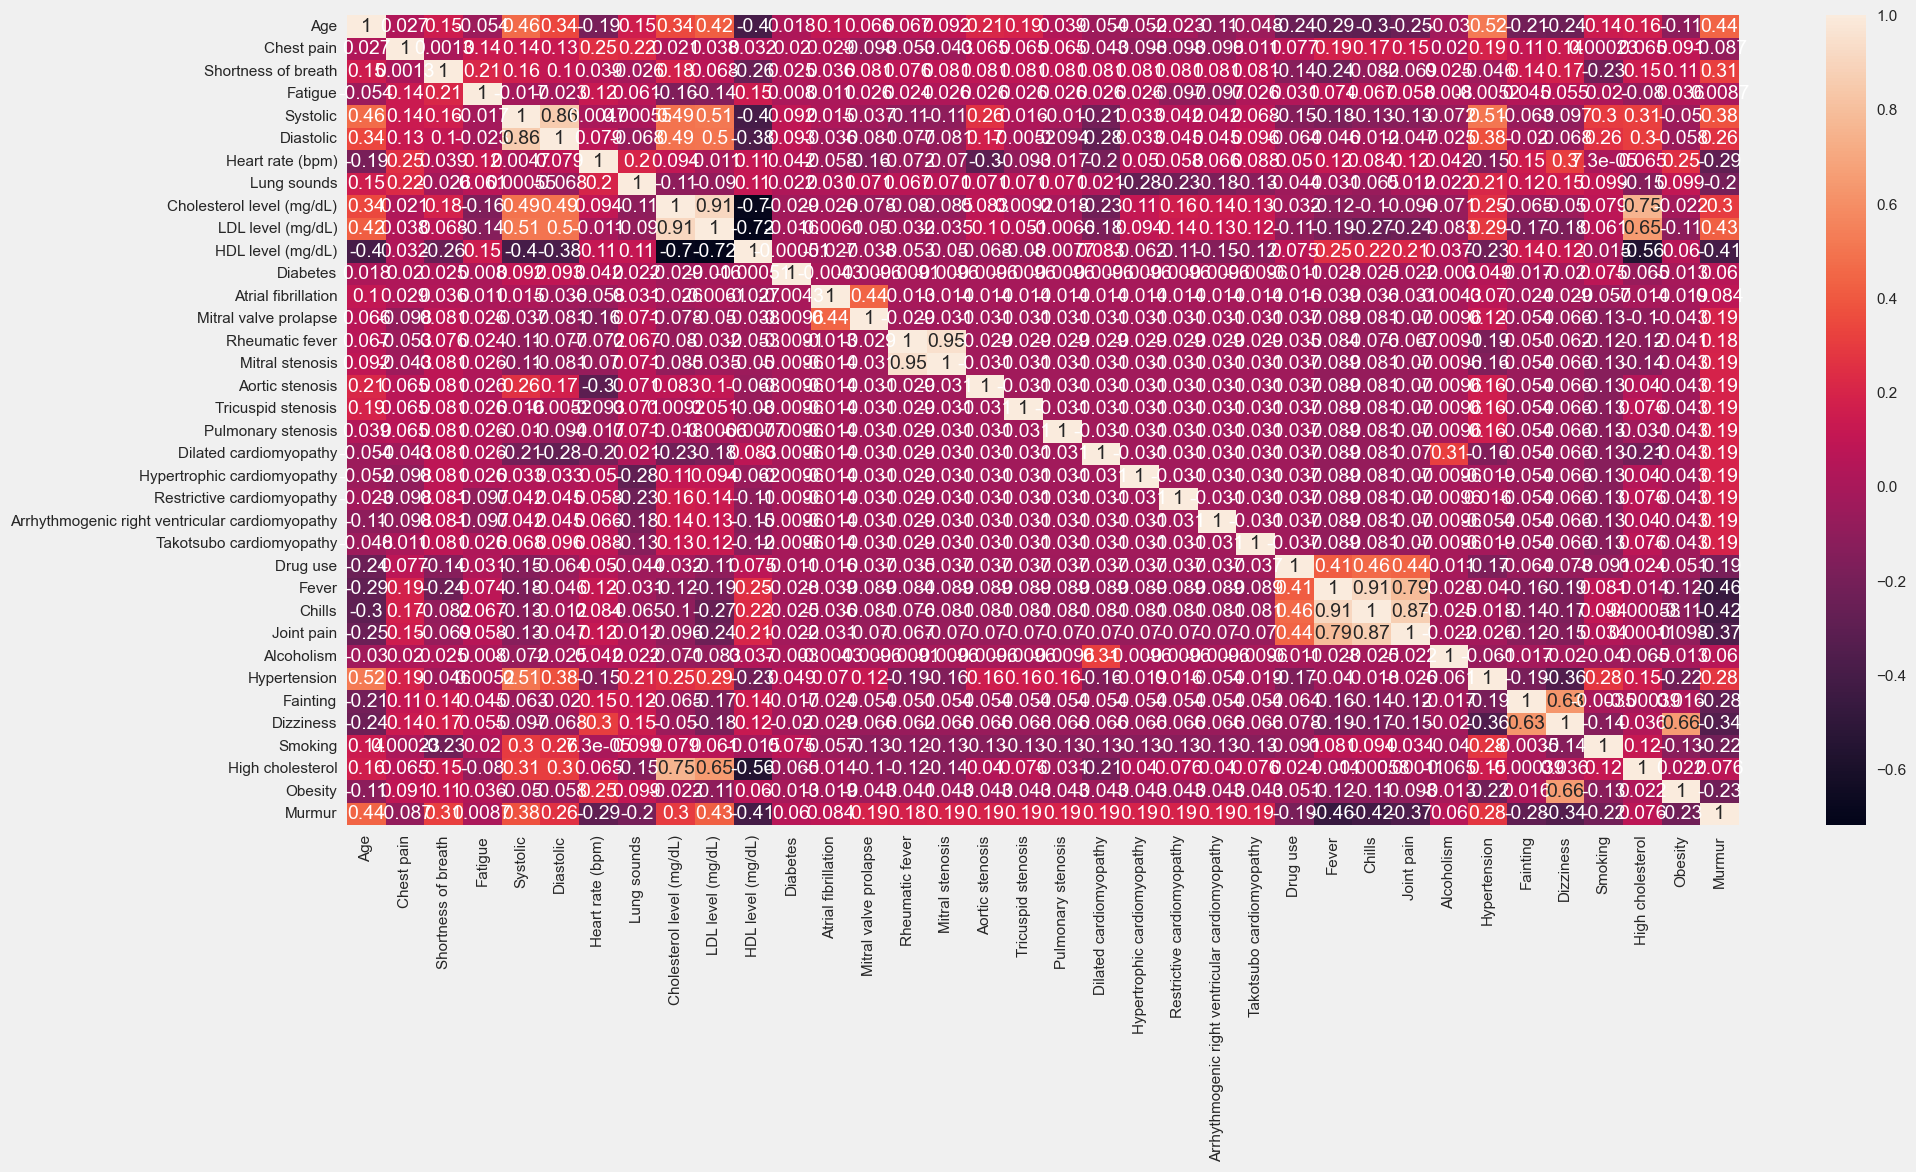

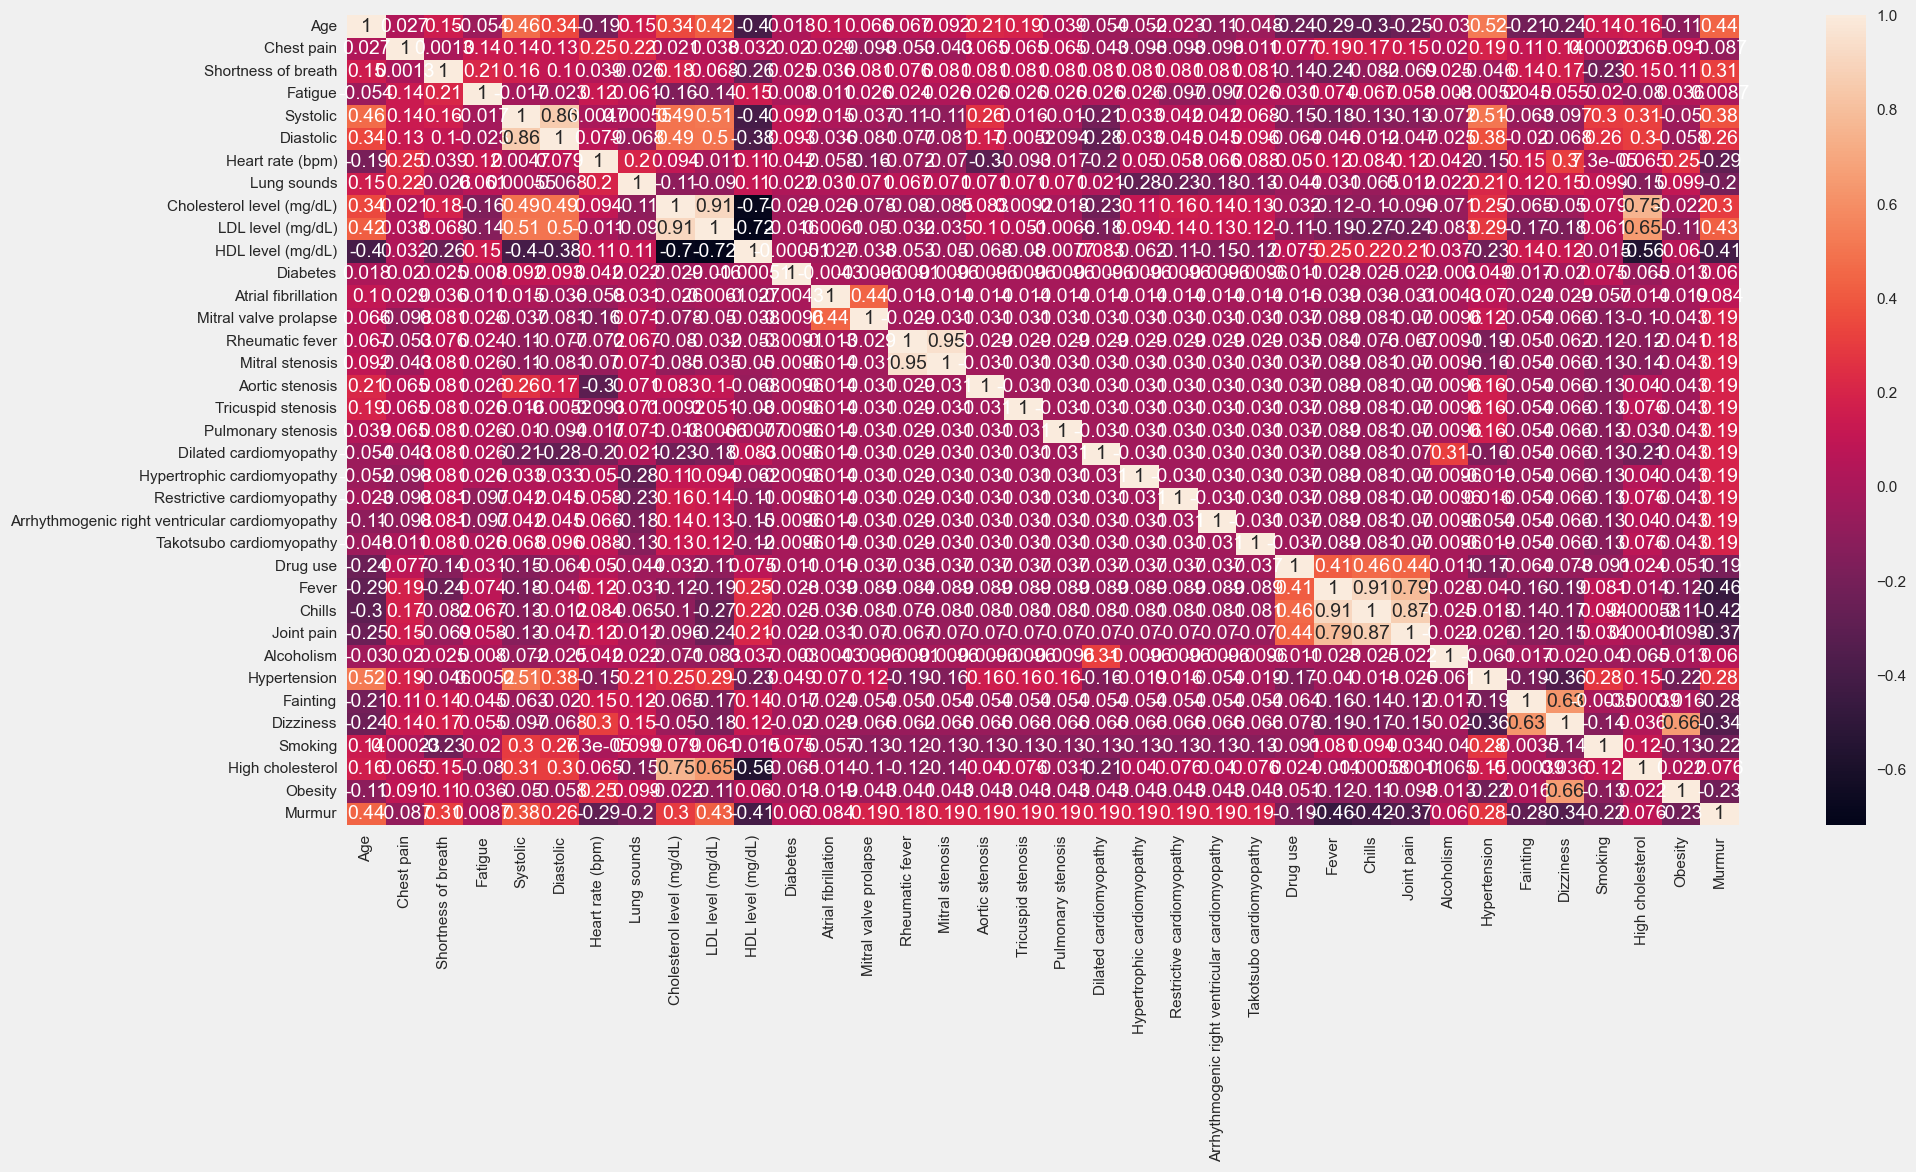

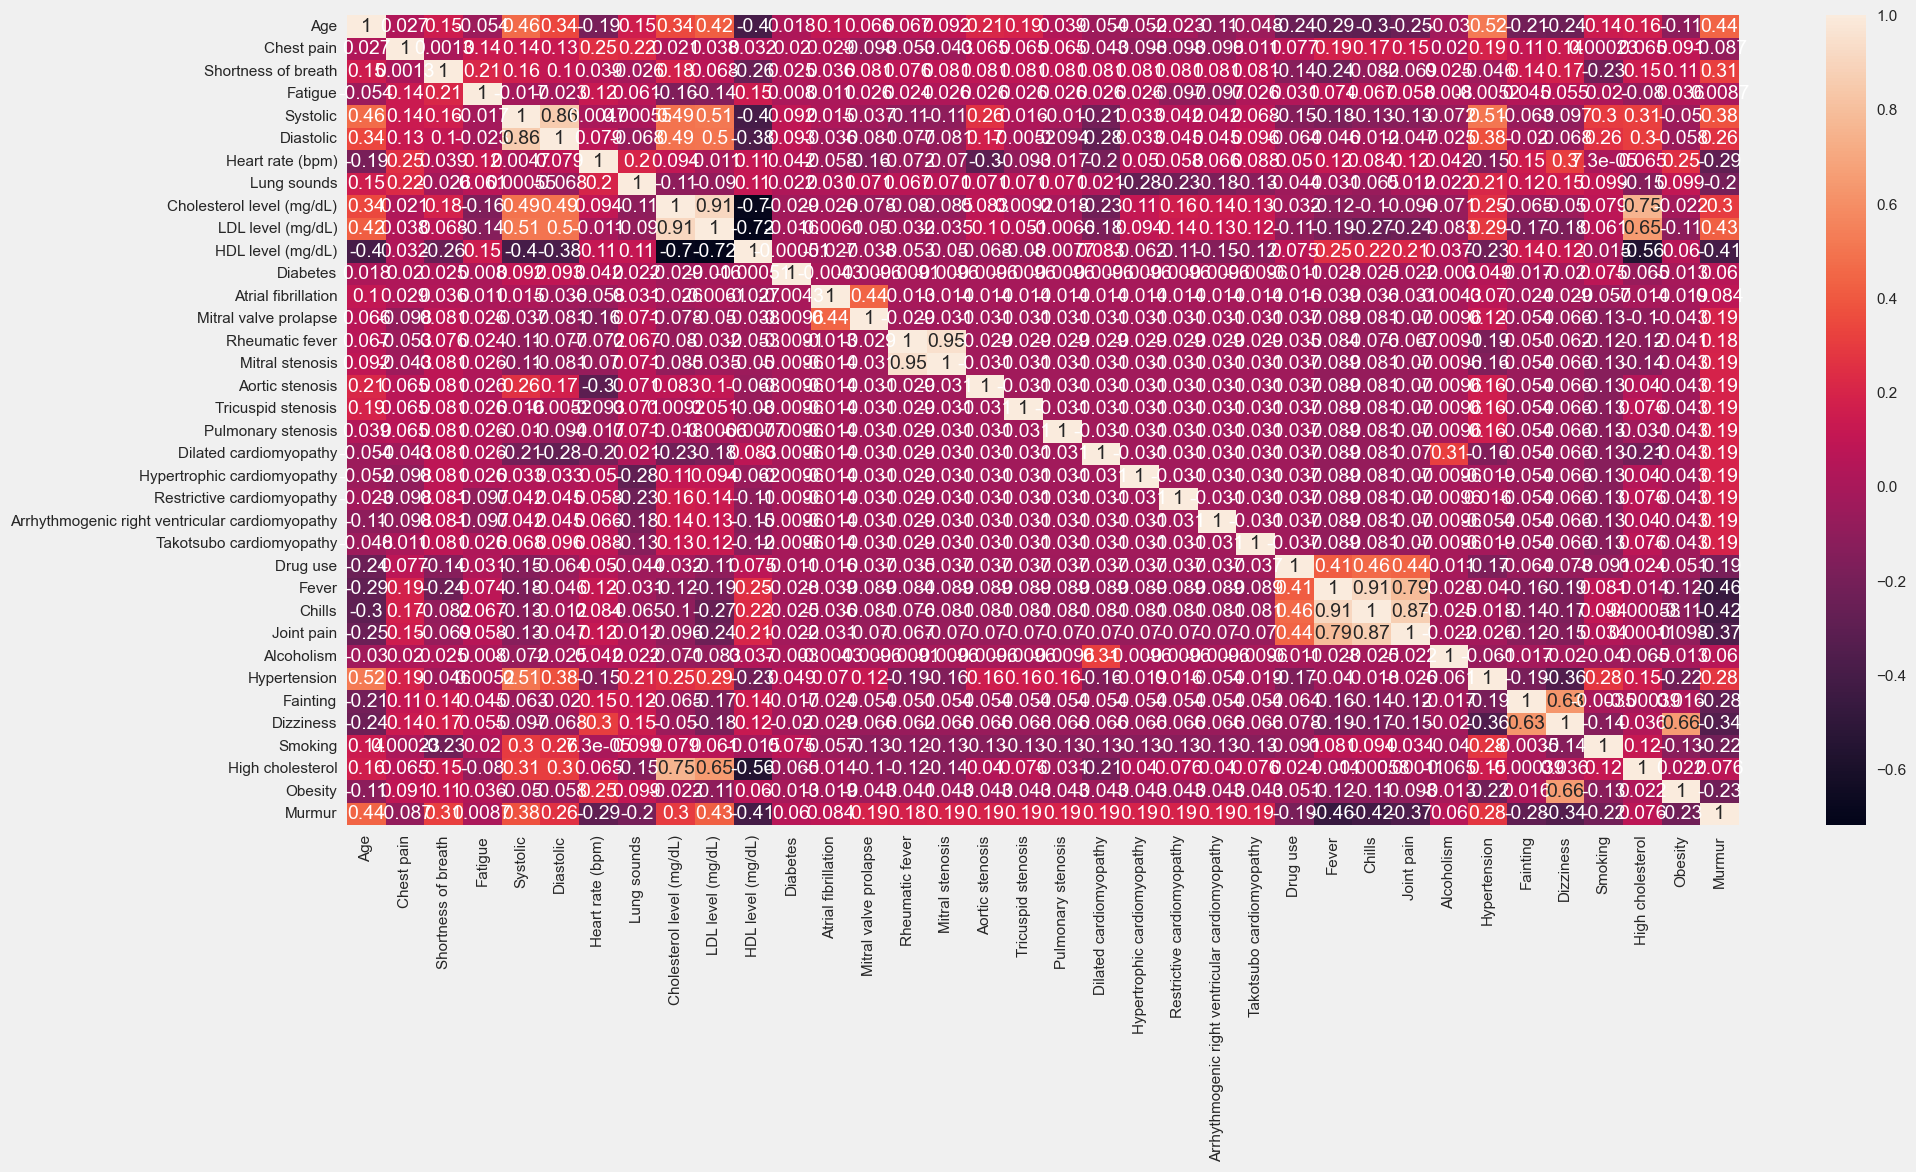

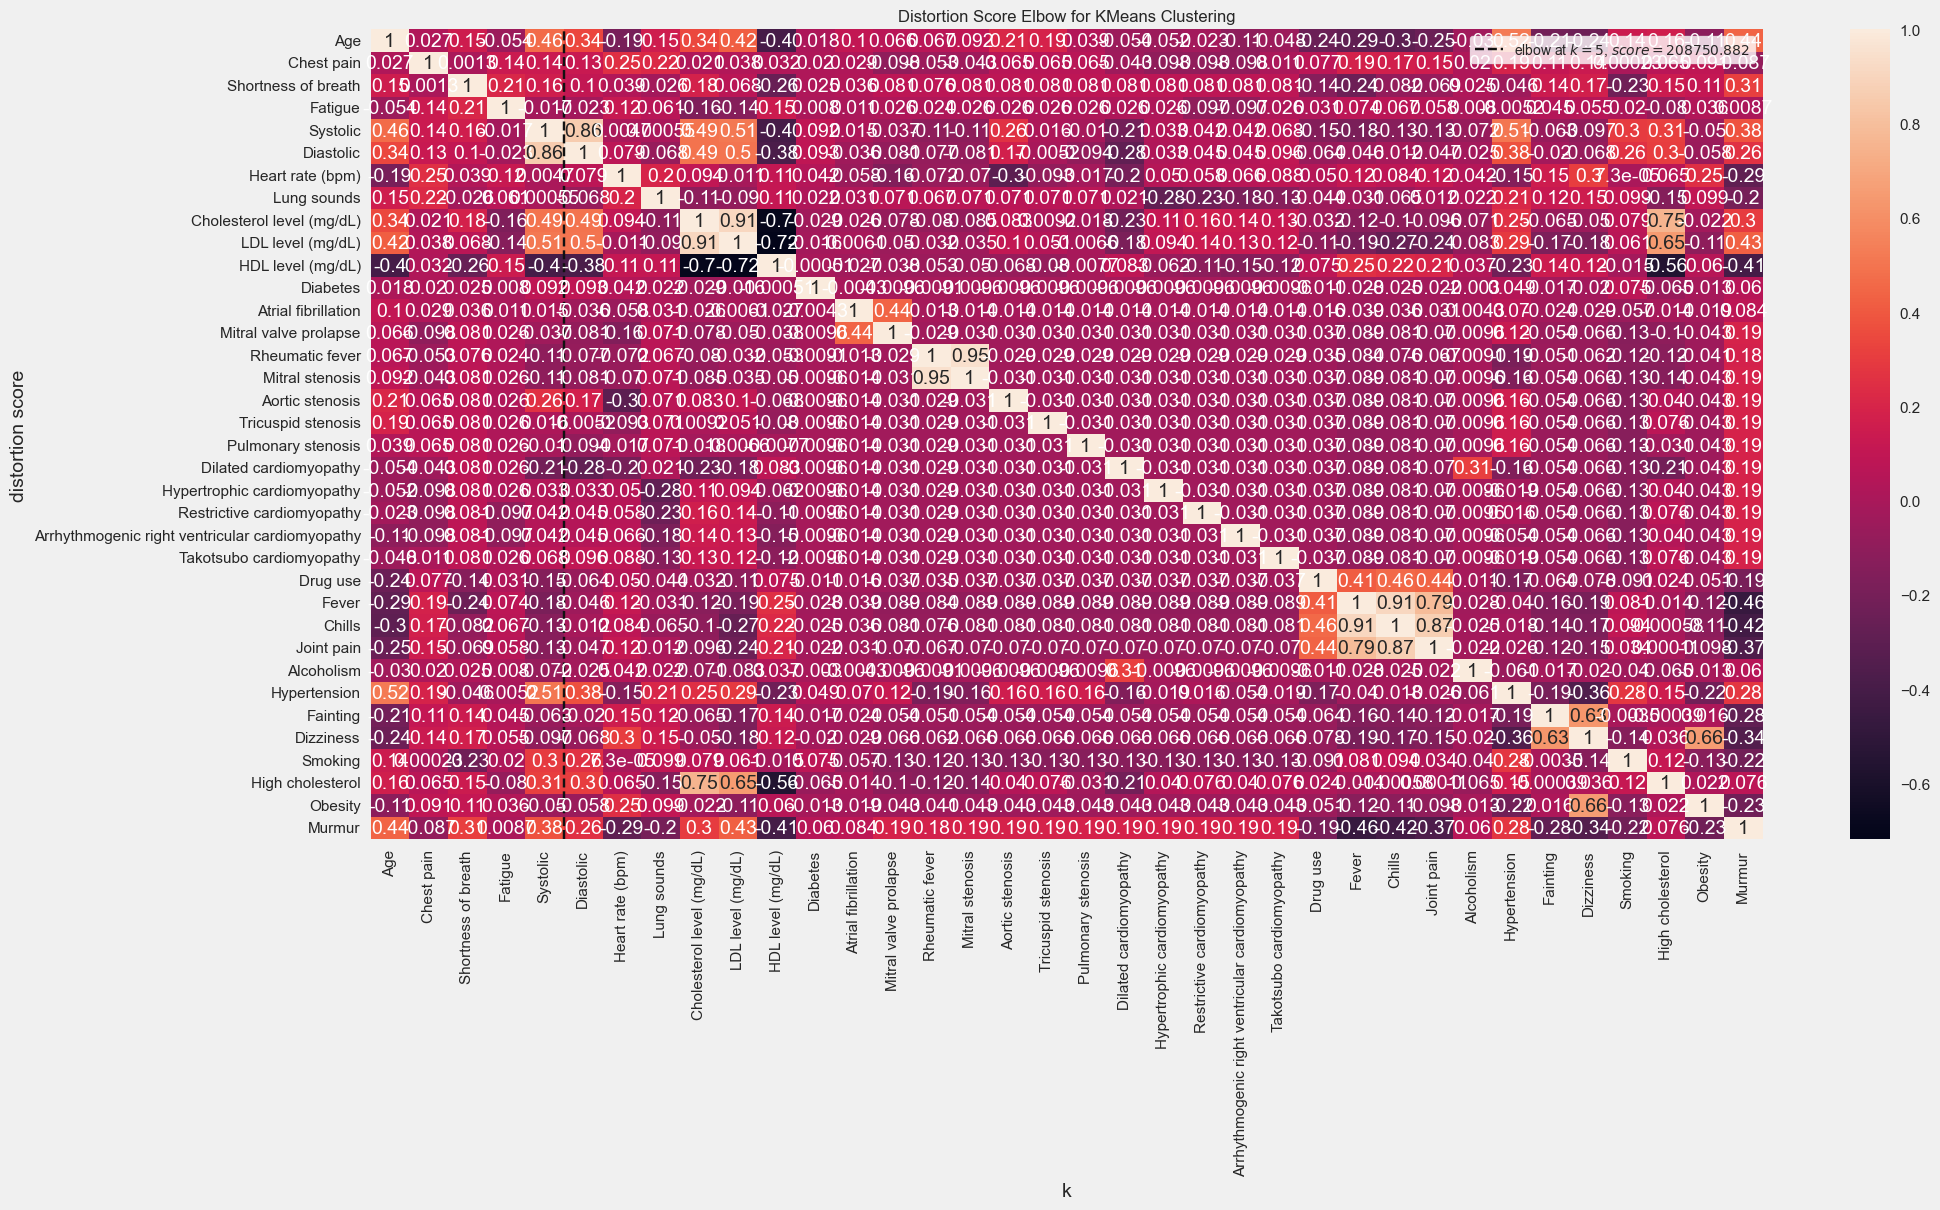

In [ ]:
plot_model(model, 'elbow')

In [ ]:
plot_model(model, 'cluster')